Skipping file with invalid roll number: classified_students.csv
Skipping file with invalid roll number: students.csv


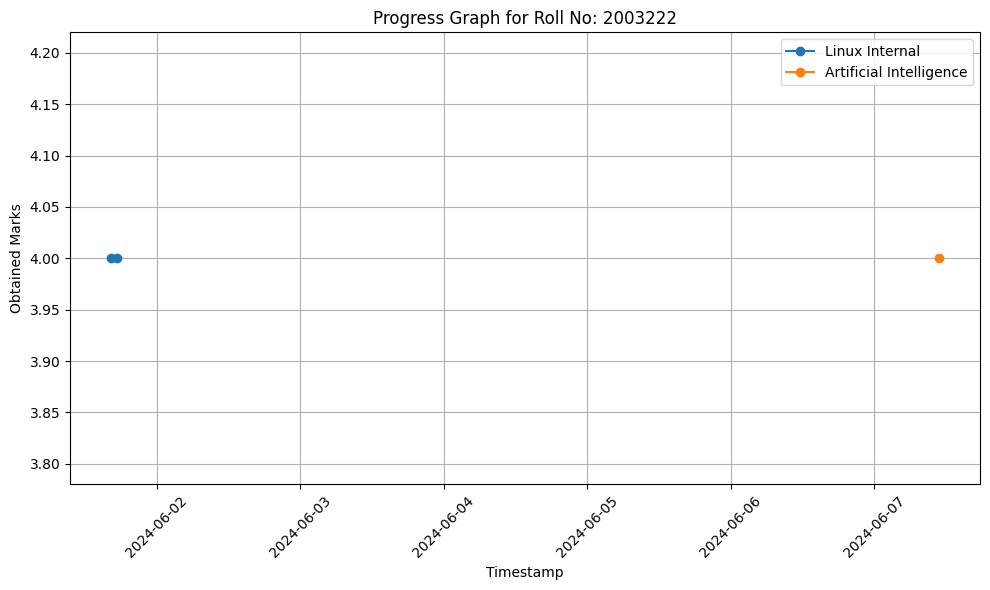

Graph saved to ./Graphs\2003222.png


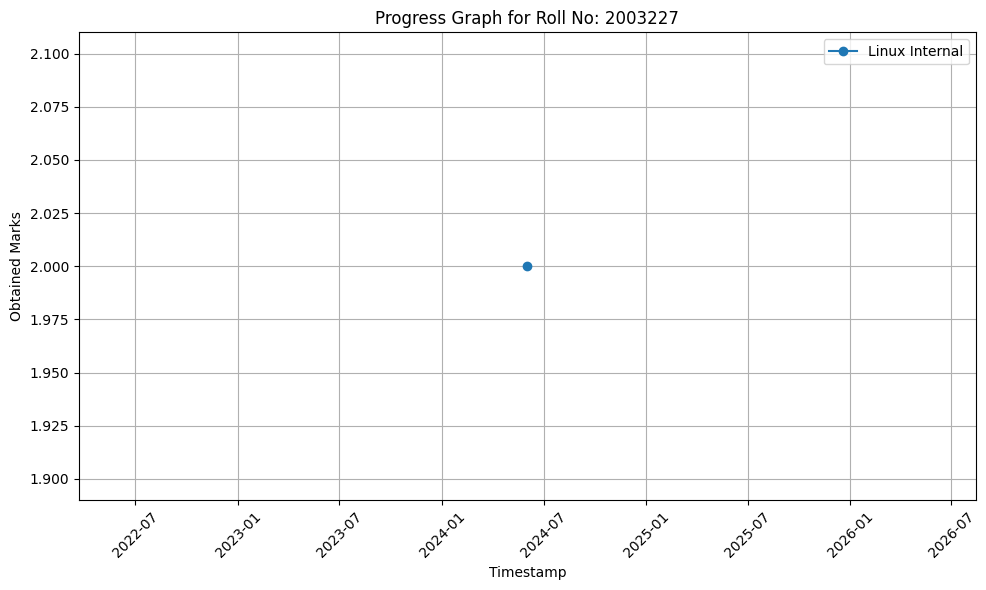

Graph saved to ./Graphs\2003227.png


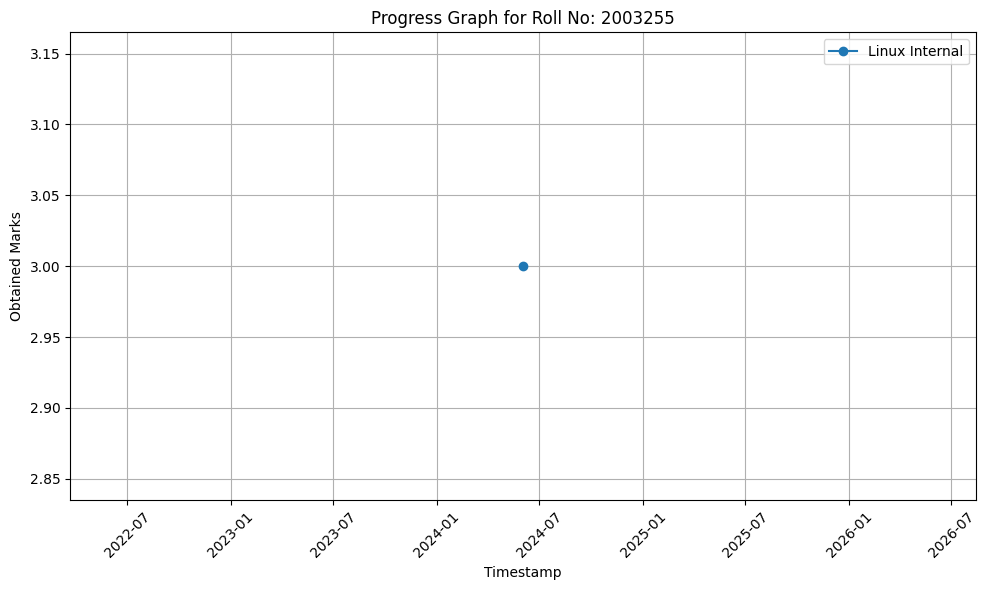

Graph saved to ./Graphs\2003255.png
Skipping file with invalid roll number: classified_students.csv
Skipping file with invalid roll number: students.csv


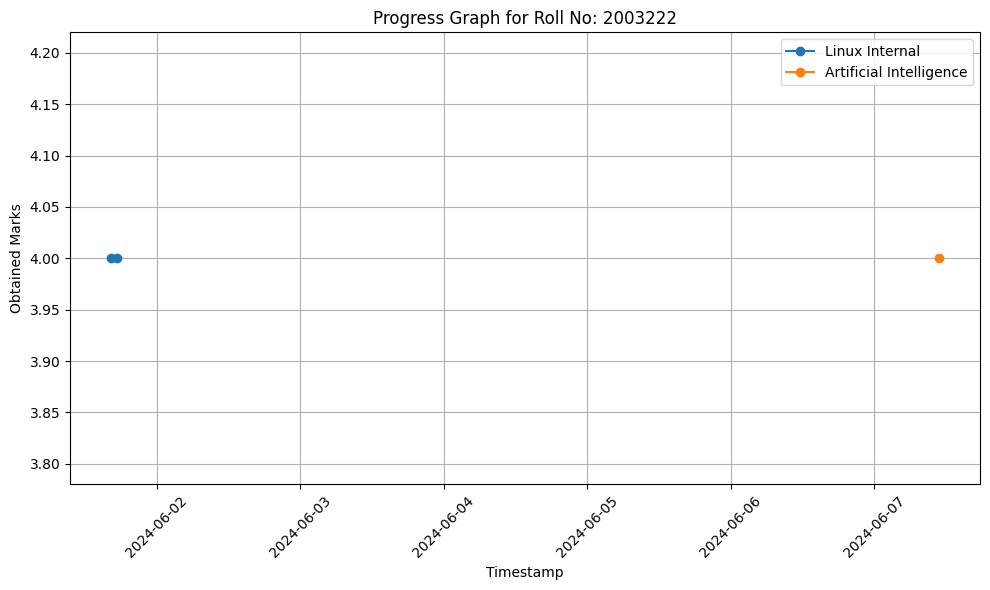

Graph saved to ./Graphs\2003222.png


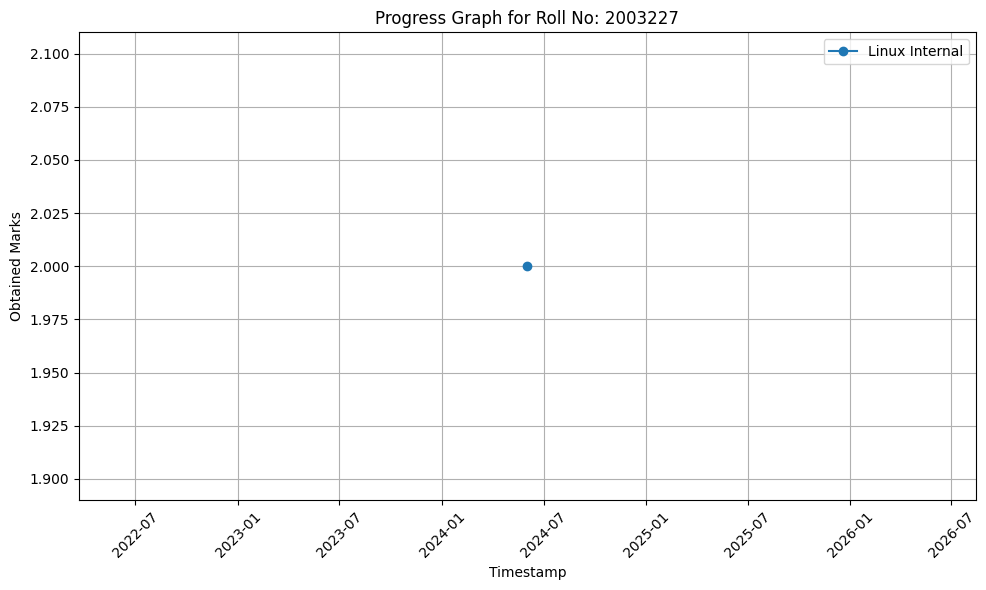

Graph saved to ./Graphs\2003227.png


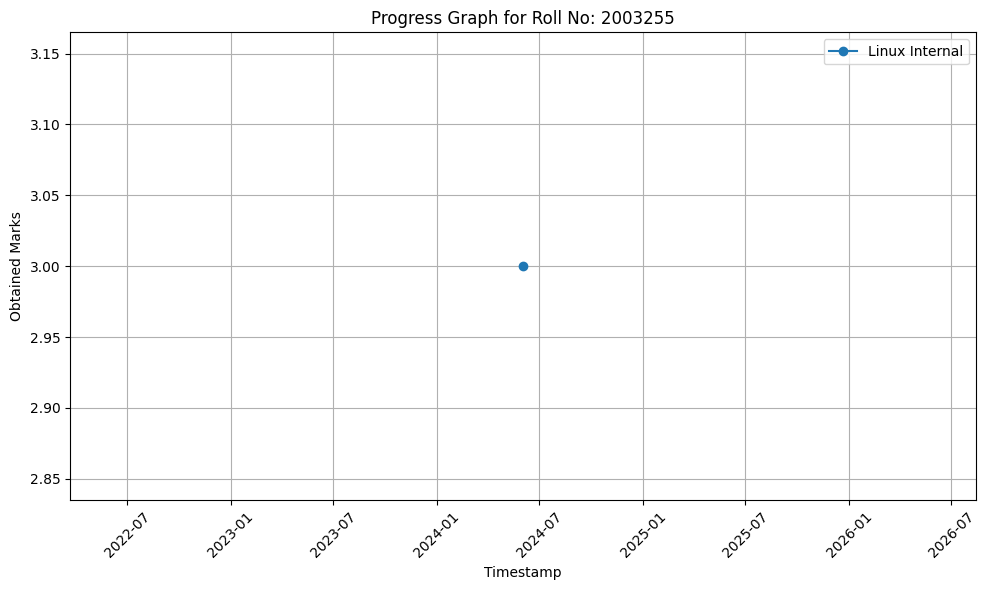

Graph saved to ./Graphs\2003255.png
Skipping file with invalid roll number: classified_students.csv
Skipping file with invalid roll number: students.csv


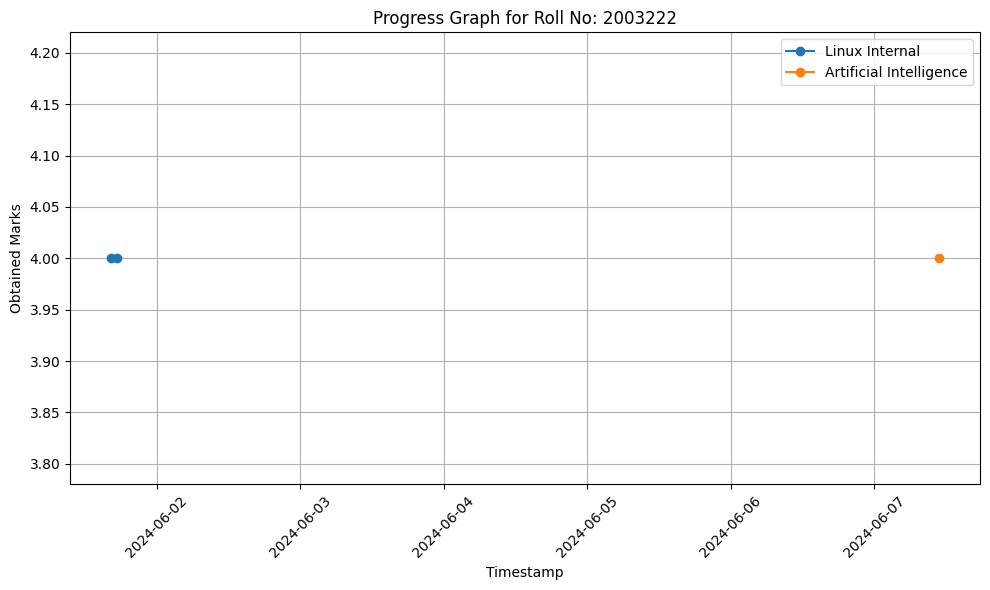

Graph saved to ./Graphs\2003222.png


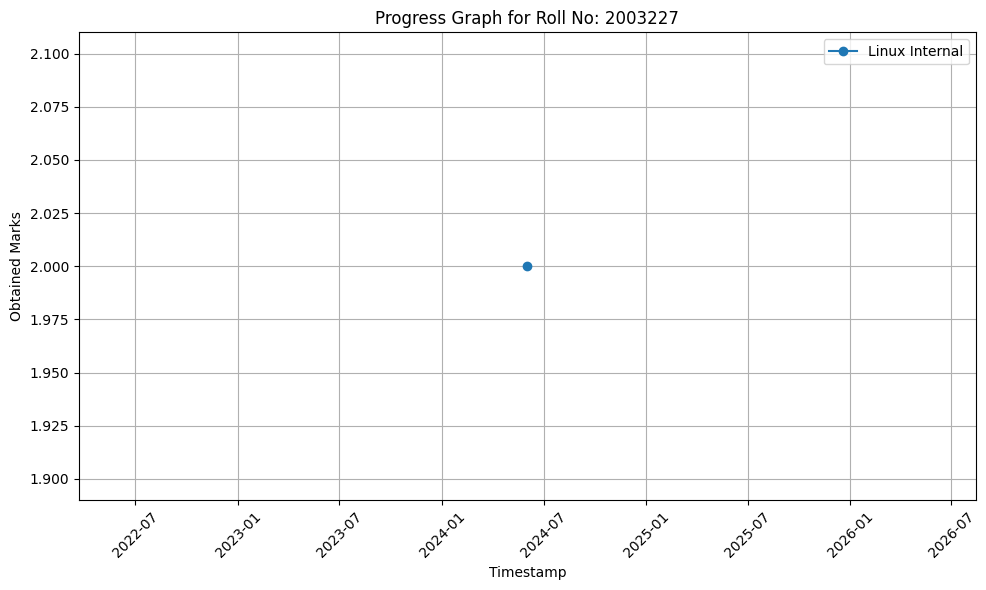

Graph saved to ./Graphs\2003227.png


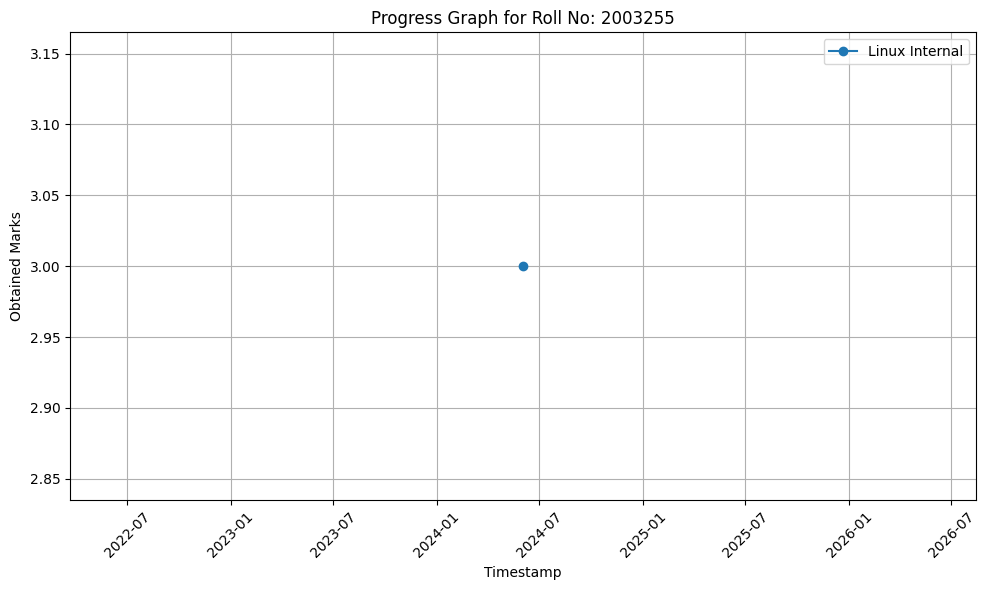

Graph saved to ./Graphs\2003255.png


KeyboardInterrupt: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

# Function to read student data from a CSV file
def read_student_data(directory, roll_no):
    file_name = os.path.join(directory, f"{roll_no}.csv")
    if os.path.exists(file_name):
        return pd.read_csv(file_name)
    else:
        print(f"File for roll no {roll_no} not found in {directory}.")
        return None

# Function to plot progress graph for a student and save it to a file
def plot_student_progress(directory, roll_no, output_dir):
    student_data = read_student_data(directory, roll_no)
    
    if student_data is not None:
        # Check if required columns exist
        required_columns = {'timestamp', 'obtained_marks', 'subject-name'}
        if not required_columns.issubset(student_data.columns):
            print(f"Required columns not found in {roll_no}.csv. Columns available: {student_data.columns}")
            return

        # Convert timestamp to a datetime format for better plotting
        student_data['timestamp'] = pd.to_datetime(student_data['timestamp'])

        plt.figure(figsize=(10, 6))
        
        # Plot obtained_marks over time, grouped by subject_name
        for subject in student_data['subject-name'].unique():
            subject_data = student_data[student_data['subject-name'] == subject]
            plt.plot(subject_data['timestamp'], subject_data['obtained_marks'], marker='o', label=subject)
        
        plt.title(f"Progress Graph for Roll No: {roll_no}")
        plt.xlabel("Timestamp")
        plt.ylabel("Obtained Marks")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()       # Adjust layout for better fit
        
        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        # Save the plot to the specified directory
        output_file = os.path.join(output_dir, f"{roll_no}.png")
        plt.savefig(output_file)
        
        plt.show()
        print(f"Graph saved to {output_file}")

# Function to get list of roll numbers from the directory
def get_roll_numbers(directory):
    files = os.listdir(directory)
    roll_numbers = []
    for file in files:
        if file.endswith('.csv'):
            try:
                roll_no = int(file.split('.')[0])
                roll_numbers.append(roll_no)
            except ValueError:
                # Skip files that don't have a numeric roll number
                print(f"Skipping file with invalid roll number: {file}")
    return roll_numbers

# Directory containing student CSV files
csv_directory = "./csv_files"  # Replace with your directory path
# Directory to save graphs
graph_directory = "./Graphs"  # Replace with your directory path

while True:
    # Get list of roll numbers from the directory
    student_roll_nos = get_roll_numbers(csv_directory)

    # Plot progress graphs for all students
    for roll_no in student_roll_nos:
        plot_student_progress(csv_directory, roll_no, graph_directory)
    
    # Wait for 10 seconds before the next iteration
    time.sleep(10)
